In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA PREPERATION & EXPLORATORY DATA ANALYSIS

In [2]:
df = pd.read_csv('unemployment_data.csv')

In [3]:
df

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
910,2023-11-01,3.7
911,2023-12-01,3.7
912,2024-01-01,3.7
913,2024-02-01,3.9


In [4]:
df.shape

(915, 2)

In [5]:
df.describe()

,UNRATE
count,915.000000
mean,5.698470
std,1.710477
min,2.500000
25%,4.400000
50%,5.500000
75%,6.700000
max,14.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    915 non-null    object 
 1   UNRATE  915 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.4+ KB


In [7]:
df.head(10)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [8]:
df.dtypes

DATE       object
UNRATE    float64
dtype: object

In [9]:
# Conver DATE's type to datetime, in order to make mathematical operations and amendment procedure.
df.DATE = pd.to_datetime(df.DATE)

In [10]:
df.dtypes

DATE      datetime64[ns]
UNRATE           float64
dtype: object

In [11]:
# check for any missing data:
df.value_counts()

DATE        UNRATE
1948-01-01  3.4       1
1998-02-01  4.6       1
1998-04-01  4.3       1
1998-05-01  4.4       1
1998-06-01  4.5       1
                     ..
1973-09-01  4.8       1
1973-10-01  4.6       1
1973-11-01  4.8       1
1973-12-01  4.9       1
2024-03-01  3.8       1
Length: 915, dtype: int64

In [12]:
df.isna().sum()
# Hence, there are no missing data on our dataset.
# This is a really quick way to see how many missing values there are in each column.

DATE      0
UNRATE    0
dtype: int64

In [13]:
# Another thing you can do is specifically display rows with missing values so that you can inspect them further.
df[df.isna().any(axis=1)]
# So, we confirmed that there is no any missing values.

,DATE,UNRATE


In [14]:
# Check for duplicate values
df[df.duplicated()]
# There are no duplicated value aswell in our dataset.

,DATE,UNRATE


In [15]:
# Check for outliers.
# An outlier is a value in a dataset that is much bigger or smaller than the others
# We can identify outliers in different ways using plots & statistics.
# Identifying outliers:
    # 1) Histogram,
    # 2) Box Plot
    # 3) Standard Deviation
# The thing with each of these techniques though is that none of them will tell you definitely which points are outliers.

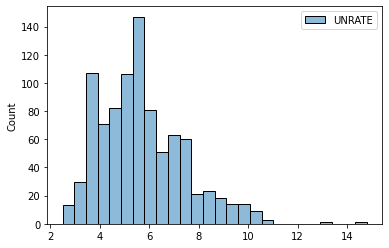

In [16]:
sns.histplot(df); 

<AxesSubplot:xlabel='UNRATE'>

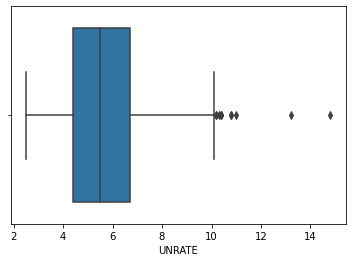

In [17]:
sns.boxplot(x=df.UNRATE)

In [18]:
df.columns

Index(['DATE', 'UNRATE'], dtype='object')

In [19]:
df.dtypes

DATE      datetime64[ns]
UNRATE           float64
dtype: object

In [20]:
df['DATE'].dt.year

0      1948
1      1948
2      1948
3      1948
4      1948
       ... 
910    2023
911    2023
912    2024
913    2024
914    2024
Name: DATE, Length: 915, dtype: int64

In [21]:
# Now extract years from DATE column.
df['YEARS'] = df['DATE'].dt.year

In [22]:
df.head()

,DATE,UNRATE,YEARS
0,1948-01-01,3.4,1948
1,1948-02-01,3.8,1948
2,1948-03-01,4.0,1948
3,1948-04-01,3.9,1948
4,1948-05-01,3.5,1948


In [23]:
df.dtypes

DATE      datetime64[ns]
UNRATE           float64
YEARS              int64
dtype: object

In [24]:
df.DATE = pd.to_datetime(df.DATE)

In [25]:
df.dtypes

DATE      datetime64[ns]
UNRATE           float64
YEARS              int64
dtype: object

In [26]:
df

,DATE,UNRATE,YEARS
0,1948-01-01,3.4,1948
1,1948-02-01,3.8,1948
2,1948-03-01,4.0,1948
3,1948-04-01,3.9,1948
4,1948-05-01,3.5,1948
...,...,...,...
910,2023-11-01,3.7,2023
911,2023-12-01,3.7,2023
912,2024-01-01,3.7,2024
913,2024-02-01,3.9,2024


In [27]:
df.dtypes

DATE      datetime64[ns]
UNRATE           float64
YEARS              int64
dtype: object

In [28]:
df['YEAR'] = df['DATE'].dt.year

In [29]:
df

,DATE,UNRATE,YEARS,YEAR
0,1948-01-01,3.4,1948,1948
1,1948-02-01,3.8,1948,1948
2,1948-03-01,4.0,1948,1948
3,1948-04-01,3.9,1948,1948
4,1948-05-01,3.5,1948,1948
...,...,...,...,...
910,2023-11-01,3.7,2023,2023
911,2023-12-01,3.7,2023,2023
912,2024-01-01,3.7,2024,2024
913,2024-02-01,3.9,2024,2024


In [30]:
df.drop(columns=['YEARS'], inplace=True)

In [31]:
df

,DATE,UNRATE,YEAR
0,1948-01-01,3.4,1948
1,1948-02-01,3.8,1948
2,1948-03-01,4.0,1948
3,1948-04-01,3.9,1948
4,1948-05-01,3.5,1948
...,...,...,...
910,2023-11-01,3.7,2023
911,2023-12-01,3.7,2023
912,2024-01-01,3.7,2024
913,2024-02-01,3.9,2024


In [32]:
df['MONTHS'] = df['DATE'].dt.month
df['DAYS'] = df['DATE'].dt.day

In [33]:
df

,DATE,UNRATE,YEAR,MONTHS,DAYS
0,1948-01-01,3.4,1948,1,1
1,1948-02-01,3.8,1948,2,1
2,1948-03-01,4.0,1948,3,1
3,1948-04-01,3.9,1948,4,1
4,1948-05-01,3.5,1948,5,1
...,...,...,...,...,...
910,2023-11-01,3.7,2023,11,1
911,2023-12-01,3.7,2023,12,1
912,2024-01-01,3.7,2024,1,1
913,2024-02-01,3.9,2024,2,1


In [34]:
df.drop(columns=['DATE'], inplace=True)
df.drop(columns=['DAYS'], inplace=True)

In [35]:
df

,UNRATE,YEAR,MONTHS
0,3.4,1948,1
1,3.8,1948,2
2,4.0,1948,3
3,3.9,1948,4
4,3.5,1948,5
...,...,...,...
910,3.7,2023,11
911,3.7,2023,12
912,3.7,2024,1
913,3.9,2024,2


In [46]:
filtered_df = (df[df['YEAR'] > 2000])

In [47]:
filtered_df

,UNRATE,YEAR,MONTHS
636,4.2,2001,1
637,4.2,2001,2
638,4.3,2001,3
639,4.4,2001,4
640,4.3,2001,5
...,...,...,...
910,3.7,2023,11
911,3.7,2023,12
912,3.7,2024,1
913,3.9,2024,2


In [48]:
second_filtered_df = filtered_df[filtered_df['MONTHS'] < 6]

In [49]:
second_filtered_df

,UNRATE,YEAR,MONTHS
636,4.2,2001,1
637,4.2,2001,2
638,4.3,2001,3
639,4.4,2001,4
640,4.3,2001,5
...,...,...,...
903,3.4,2023,4
904,3.7,2023,5
912,3.7,2024,1
913,3.9,2024,2


In [50]:
third_filtered_df = second_filtered_df[second_filtered_df['YEAR'] < 2024].reset_index()

In [52]:
third_filtered_df.drop(columns='index', inplace=True)

In [53]:
third_filtered_df

,UNRATE,YEAR,MONTHS
0,4.2,2001,1
1,4.2,2001,2
2,4.3,2001,3
3,4.4,2001,4
4,4.3,2001,5
...,...,...,...
110,3.4,2023,1
111,3.6,2023,2
112,3.5,2023,3
113,3.4,2023,4


In [69]:
third_filtered_df['01'] = third_filtered_df['MONTHS'] ==1 

In [71]:
third_filtered_df.drop(columns='01', inplace=True)

In [72]:
third_filtered_df

,UNRATE,YEAR,MONTHS
0,4.2,2001,1
1,4.2,2001,2
2,4.3,2001,3
3,4.4,2001,4
4,4.3,2001,5
...,...,...,...
110,3.4,2023,1
111,3.6,2023,2
112,3.5,2023,3
113,3.4,2023,4


,UNRATE,YEAR,MONTHS,Month_Code
0,4.2,2001,1,01
1,4.2,2001,2,02
2,4.3,2001,3,03
3,4.4,2001,4,04
4,4.3,2001,5,05
...,...,...,...,...
110,3.4,2023,1,01
111,3.6,2023,2,02
112,3.5,2023,3,03
113,3.4,2023,4,04
